In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, evaluate
from surprise.model_selection import cross_validate

In [2]:
movie_data = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1",header=None, names = ['movie_id', 'year', 'movie_name'])

In [3]:
movie_data.head()

,movie_id,year,movie_name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [4]:
movie_data.set_index('movie_id',inplace=True)

In [5]:
movie_data.head()

,year,movie_name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [6]:
data1 = pd.read_csv('combined_data_1.txt', header = None, names = ['cust_id', 'movie_rating', 'date'])

In [7]:
data1.head()

,cust_id,movie_rating,date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [8]:
data2 = pd.read_csv('combined_data_2.txt',header = None,names = ['cust_id', 'movie_rating', 'date'])

In [9]:
data2.head()

,cust_id,movie_rating,date
0,4500:,NaN,NaN
1,2532865,4.0,2005-07-26
2,573364,3.0,2005-06-20
3,1696725,3.0,2004-02-27
4,1253431,3.0,2004-03-31


In [10]:
data3 = pd.read_csv('combined_data_3.txt',header = None,names = ['cust_id', 'movie_rating', 'date'])

In [11]:
data3.head()

,cust_id,movie_rating,date
0,9211:,NaN,NaN
1,1277134,1.0,2003-12-02
2,2435457,2.0,2005-06-01
3,2338545,3.0,2001-02-17
4,2218269,1.0,2002-12-27


In [12]:
data4 = pd.read_csv('combined_data_4.txt',header = None,names = ['cust_id', 'movie_rating', 'date'])

In [13]:
data4.head()

,cust_id,movie_rating,date
0,13368:,NaN,NaN
1,2385003,4.0,2004-07-08
2,659432,3.0,2005-03-16
3,751812,2.0,2002-12-16
4,2625420,2.0,2004-05-25


In [14]:
len(data1)

24058263

In [15]:
len(data2)

26982302

In [16]:
len(data3)

22605786

In [17]:
len(data4)

26851926

In [18]:
data1 = data1.iloc[:,[0,1]]

In [19]:
data2 = data2.iloc[:,[0,1]]

In [20]:
data3 = data3.iloc[:,[0,1]]

In [21]:
data4 = data4.iloc[:,[0,1]]

In [22]:
data = data1

In [23]:
data.head()

,cust_id,movie_rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [24]:
# - Uncomment once whole processing is done - working on 1 data file for faster processing
#data.append(data2)
#data.append(data3)
#data.append(data4)

In [25]:
data.shape

(24058263, 2)

##### overall data spread rating wise

In [26]:
movie_rating_count = data.groupby('movie_rating')['movie_rating'].agg(['count'])

In [27]:
movie_rating_count.head()

,count
movie_rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


##### To find count of movies in the data

In [28]:
movie_count = data.isnull().sum()[1]

In [29]:
movie_count

4499

##### To find count of customers

In [30]:
cust_count = len(data['cust_id'].unique()) - movie_count

In [31]:
cust_count

470758

##### Total ratings in the data

In [32]:
tot_rating_count = len(data) - movie_count

In [33]:
tot_rating_count

24053764

##### Plot the overall data spread

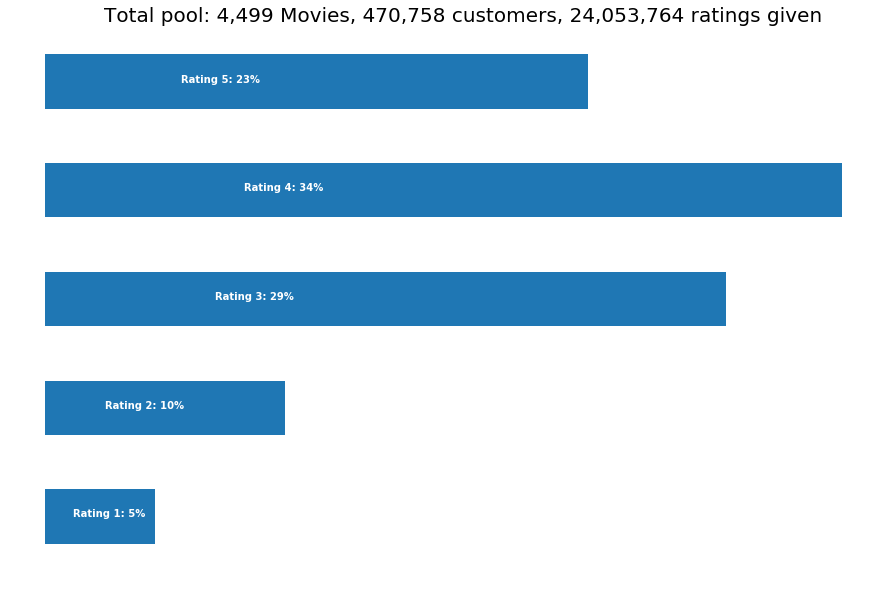

In [34]:
ax = movie_rating_count.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, tot_rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(movie_rating_count.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, movie_rating_count.iloc[i-1][0]*100 / movie_rating_count.sum()[0]), color = 'white', weight = 'bold')

###### We can see that the rating tends to be relatively positive (>3). This may be due to the fact that unhappy customers tend to just leave instead of making efforts to rate. We can keep this in mind - low rating movies mean they are generally really bad

### Data Cleaning

In [35]:
data.head()

,cust_id,movie_rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [36]:
data.index = np.arange(0,len(data))

In [37]:
data.head()

,cust_id,movie_rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [38]:
data_nan = pd.DataFrame(pd.isnull(data.movie_rating))

In [39]:
data_nan.head()

,movie_rating
0,True
1,False
2,False
3,False
4,False


In [40]:
data_nan = data_nan[data_nan['movie_rating'] == True]

In [41]:
data_nan.head()

,movie_rating
0,True
548,True
694,True
2707,True
2850,True


In [42]:
data_nan = data_nan.reset_index()

In [43]:
data_nan

,index,movie_rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
5,3991,True
6,5011,True
7,5105,True
8,20016,True
9,20112,True


In [44]:
movie_np = []
movie_id = 1

In [45]:
data_nan.head()

,index,movie_rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [46]:
np.full(7,3)

array([3, 3, 3, 3, 3, 3, 3])

In [47]:
data_nan['index'][1]

548

In [48]:
len(data_nan)-1

4498

In [49]:
#for i in range(len(data_nan)-1):
#    temp = np.full(data_nan['index'][i+1]-1,movie_id)
#    movie_np = np.append(movie_np,temp)
#    movie_id = movie_id+1 

#Impleting this functionality through below algorithm - this one was giving memory error

In [50]:
#for i in (data_nan['index'][1:]):
#    temp = np.full(i-1,movie_id)
#    movie_np = np.append(movie_np,temp)
#    movie_id = movie_id+1 


In [51]:
for i,j in zip(data_nan['index'][1:],data_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [52]:
# The last record and corresponding length
# numpy approach
last_record = np.full((1,len(data) - data_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

In [53]:
print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [54]:
data.head()

,cust_id,movie_rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [55]:
#Removing the movie id records from the main data
data = data[pd.notnull(data['movie_rating'])]



In [56]:
data.head()

,cust_id,movie_rating
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0


In [57]:
data['movie_id'] = movie_np.astype(int)
data['cust_id'] = data['cust_id'].astype(int)

C:\Users\juhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\juhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
data.head()

,cust_id,movie_rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


## Issues with the data:

#### The data set now is super huge. At several processing steps, memory error comes up
Hence we have to reduce the data and eventually improve data quality

How:
    1. Remove movie with too less reviews (they are relatively not popular)
    2. Remove customer who give too less reviews (they are relatively less active)

In [59]:
data.head()

,cust_id,movie_rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [60]:
f = ['count','mean']

In [61]:
cust_review_count = data.groupby('cust_id')['movie_rating'].agg(f)

In [62]:
cust_review_count.head()

,count,mean
cust_id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000


In [63]:
min(cust_review_count['count'])

1

In [64]:
max(cust_review_count['count'])

4467

In [66]:
cust_review_count.index

Int64Index([      6,       7,       8,      10,      25,      33,      42,
                 59,      79,      83,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='cust_id', length=470758)

In [67]:
cust_review_count.index = cust_review_count.index.map(int)

In [68]:
cust_review_count.index

Int64Index([      6,       7,       8,      10,      25,      33,      42,
                 59,      79,      83,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='cust_id', length=470758)

In [69]:
cust_benchmark = round(cust_review_count['count'].quantile(0.8),0) #Returns value at 0.8 % quantile

In [70]:
print('Customer minimum times of review: {}'.format(cust_benchmark))

Customer minimum times of review: 79.0


In [71]:
drop_cust_list = cust_review_count[cust_review_count['count'] < cust_benchmark].index

In [72]:
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649378, 2649379, 2649384, 2649388, 2649401, 2649404, 2649409,
            2649421, 2649426, 2649429],
           dtype='int64', name='cust_id', length=375433)

In [73]:
data.head()

,cust_id,movie_rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [74]:
movie_review_count = data.groupby('movie_id')['movie_rating'].agg(f)

In [75]:
movie_review_count.head()

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298


In [76]:
movie_review_count.index = movie_review_count.index.map(int)

In [77]:
movie_benchmark = round(movie_review_count['count'].quantile(0.8),0)

In [78]:
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 3884.0


In [79]:
drop_movie_list = movie_review_count[movie_review_count['count'] < movie_benchmark].index

In [80]:
drop_movie_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4485, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=3599)

In [81]:
data.head()

,cust_id,movie_rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [82]:
data.shape

(24053764, 3)

In [83]:
data = data[~data['movie_id'].isin(drop_movie_list)]
data = data[~data['cust_id'].isin(drop_cust_list)]

In [84]:
data.shape

(13528427, 3)

### Creating Pivot table for running recommendation algorithms on it

In [85]:
data_pivot = pd.pivot_table(data, values= 'movie_rating',index = 'cust_id', columns = 'movie_id')

In [86]:
print(data_pivot)

movie_id  8     17    18    26    28    30    33    44    46    52    ...   \
cust_id                                                               ...    
6          NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN  ...    
7          5.0   NaN   NaN   NaN   4.0   5.0   NaN   NaN   NaN   NaN  ...    
79         NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN  ...    
97         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
134        NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN  ...    
188        NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN  ...    
195        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
199        NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN  ...    
201        NaN   NaN   NaN   NaN   4.0   5.0   NaN   NaN   NaN   NaN  ...    
265        NaN   NaN   NaN   NaN   3.0   5.0   NaN   NaN   NaN   NaN  ...    
283        NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  

In [87]:
movie_data.head()

,year,movie_name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [88]:
data.head()

,cust_id,movie_rating,movie_id
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8
5119,1744889,1.0,8


In [89]:
#Data formating for model building on first 100k records for faster processing
reader = Reader(rating_scale=(1,5))
new_data = Dataset.load_from_df(data[['cust_id', 'movie_id', 'movie_rating']][:100000], reader)

In [93]:
#Building SVD Model
svd = SVD(n_factors=20)    # Increase latent features' value to atleast 100(default) for a higher processing system. 
                           # I am currently running on 8gb system

In [94]:
# Run 5-fold cross-validation and print results
cv_results = cross_validate(svd, new_data, measures=['RMSE', 'MAE'], cv=5)

In [95]:
cv_results

{'test_rmse': array([0.98161161, 0.97719696, 0.97643508, 0.97436699, 0.97736988]),
 'test_mae': array([0.79706372, 0.79624286, 0.79304958, 0.79357887, 0.78588896]),
 'fit_time': (3.9527597427368164,
  3.979233503341675,
  4.009820461273193,
  4.0167481899261475,
  4.0195746421813965),
 'test_time': (0.32834672927856445,
  0.255664587020874,
  0.25487256050109863,
  0.25527191162109375,
  0.255234956741333)}

In [96]:
pd.DataFrame(cv_results)

,test_rmse,test_mae,fit_time,test_time
0,0.981612,0.797064,3.952760,0.328347
1,0.977197,0.796243,3.979234,0.255665
2,0.976435,0.793050,4.009820,0.254873
3,0.974367,0.793579,4.016748,0.255272
4,0.977370,0.785889,4.019575,0.255235


In [97]:
#Let's check particular user and his/her movie taste
data_785314 = data[(data['cust_id']==785314) & (data['movie_rating']==5)]

In [98]:
data_785314

,cust_id,movie_rating,movie_id
577616,785314,5.0,175
1473265,785314,5.0,311
1670799,785314,5.0,329
1764097,785314,5.0,331
4053834,785314,5.0,788
4146817,785314,5.0,798
4657028,785314,5.0,907
4856665,785314,5.0,985
7732070,785314,5.0,1552
9689181,785314,5.0,1905


In [99]:
data_785314 = data_785314.set_index('movie_id')

In [100]:
movie_data.head()

,year,movie_name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [101]:
data_785314.head()

,cust_id,movie_rating
movie_id,,
175,785314,5.0
311,785314,5.0
329,785314,5.0
331,785314,5.0
788,785314,5.0


In [102]:
#Let's get the movie names
data_785314 = data_785314.join(movie_data)['movie_name']

In [103]:
data_785314

movie_id
175                                        Reservoir Dogs
311                                               Ed Wood
329                                                 Dogma
331                                           Chasing Amy
788                                                Clerks
798                                                  Jaws
907                                       Animal Crackers
985                                             The Mummy
1552                                          Black Adder
1905    Pirates of the Caribbean: The Curse of the Bla...
2000                          Four Weddings and a Funeral
2122                                 Being John Malkovich
2342                                        Super Size Me
2360                                  Singin' in the Rain
2430                           Alien: Collector's Edition
2443                             Like Water for Chocolate
2452        Lord of the Rings: The Fellowship of the Ring
2465 

#### Predicting which movies would user 785314 love to watch in future

In [104]:
user_785314 = movie_data.copy()
user_785314.head()

,year,movie_name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [105]:
user_785314 = user_785314.reset_index()
user_785314.head()

,movie_id,year,movie_name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [106]:
user_785314 = user_785314[~user_785314['movie_id'].isin(drop_movie_list)]
#drop all movies with rating less than 3884

In [107]:
# getting full dataset to predict svd score on
full_data = Dataset.load_from_df(data[['cust_id', 'movie_id', 'movie_rating']], reader)

In [108]:
#T
trainset = full_data.build_full_trainset()

In [109]:
svd.fit(trainset)

In [110]:
user_785314.head()

,movie_id,year,movie_name
7,8,2004.0,What the #$*! Do We Know!?
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
25,26,2004.0,Never Die Alone
27,28,2002.0,Lilo and Stitch


In [111]:
user_785314['estimate_score'] = user_785314['movie_id'].apply(lambda x: svd.predict(785314, x).est)

In [112]:
user_785314['estimate_score']

7        2.777914
16       2.028440
17       3.661964
25       1.987516
27       3.532804
29       2.981038
32       4.108341
43       3.100396
45       3.454391
51       3.370596
57       3.021712
76       1.827435
77       2.202142
82       3.268558
96       3.363618
107      2.795906
110      1.949064
117      2.959206
137      3.247251
142      3.418281
147      1.708317
151      3.506839
155      2.949787
164      3.954899
165      3.051815
166      3.767558
170      3.341815
174      4.225649
186      3.407423
188      3.405568
           ...   
17740    3.287771
17741    3.287771
17742    3.287771
17743    3.287771
17744    3.287771
17745    3.287771
17746    3.287771
17747    3.287771
17748    3.287771
17749    3.287771
17750    3.287771
17751    3.287771
17752    3.287771
17753    3.287771
17754    3.287771
17755    3.287771
17756    3.287771
17757    3.287771
17758    3.287771
17759    3.287771
17760    3.287771
17761    3.287771
17762    3.287771
17763    3.287771
17764    3

In [113]:
user_785314 = user_785314.drop('movie_id', axis = 1)

In [115]:
user_785314 = user_785314.sort_values('estimate_score', ascending=False)

In [117]:
user_785314.head(15)

,year,movie_name,estimate_score
3045,1990.0,The Simpsons: Treehouse of Horror,4.891593
2171,1991.0,The Simpsons: Season 3,4.854753
4114,1999.0,The Simpsons: Bart Wars,4.835561
3667,2000.0,Farscape: Season 2,4.833613
2101,1994.0,The Simpsons: Season 6,4.787886
4382,2004.0,Farscape: The Peacekeeper Wars,4.787318
2113,2002.0,Firefly,4.759726
2056,2001.0,Buffy the Vampire Slayer: Season 6,4.698587
3149,2000.0,Monty Python: The Life of Python,4.675936
3443,2004.0,Family Guy: Freakin' Sweet Collection,4.674383


## Recommendations with Pearsons' R correlations

In [153]:
movie_data.head(15)

,year,movie_name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [130]:
movie_data.index[movie_data['movie_name']=='Dinosaur Planet'][0]

1

In [133]:
data_pivot.head()

movie_id,8,17,18,26,28,30,33,44,46,52,...,4454,4465,4472,4474,4479,4488,4490,4492,4493,4496
cust_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
data_pivot.head()

movie_id,8,17,18,26,28,30,33,44,46,52,...,4454,4465,4472,4474,4479,4488,4490,4492,4493,4496
cust_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on Pearsons'R correlation - ")
    i = int(movie_data.index[movie_data['movie_name'] == movie_title][0])
    #print(i)
    target = data_pivot.iloc[:,i]
    #print(target)
    similar_to_target = data_pivot.corrwith(target)
    #print(similar_to_target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(movie_data).join(movie_review_count)[['PearsonR', 'movie_name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

In [173]:
recommend("What the #$*! Do We Know!?", 0)

For movie (What the #$*! Do We Know!?)
- Top 10 movies recommended based on Pearsons'R correlation - 
PearsonR                                 movie_name  count      mean
                                                                    
1.000000             Rudolph the Red-Nosed Reindeer   6558  3.806496
0.427611                       The Fighting Seabees   4155  3.514320
0.393474          Jeff Foxworthy: Totally Committed   5055  3.716123
0.392803                               Walking Tall   4214  3.596820
0.386718                       The Three Musketeers   4312  3.751855
0.375876  Daughter from Danang: American Experience   4785  3.481923
0.355253                                  Born Free   5561  3.839238
0.353854                       Recess: School's Out   4217  3.246858
0.353442                         Herbie Rides Again   4378  3.710370
0.351609                      Woman Thou Art Loosed   5132  3.628800


In [174]:
recommend("Dinosaur Planet", 0)

For movie (Dinosaur Planet)
- Top 10 movies recommended based on Pearsons'R correlation - 
PearsonR           movie_name  count      mean
                                              
1.000000            7 Seconds   7108  2.903208
0.530227       Morvern Callar   3922  2.703468
0.504392       Cop and a Half   5652  2.314933
0.454552        King's Ransom   8135  2.938291
0.446566           Undisputed   5210  3.072745
0.446024      Velvet Goldmine   5909  3.236927
0.435230               Cyborg   4110  2.861557
0.427790      Code of Silence   4191  2.623717
0.426622         The Avengers   4412  2.334769
0.424969  Armed and Dangerous   4585  3.225954


In [175]:
recommend("My Favorite Brunette",0)

For movie (My Favorite Brunette)
- Top 10 movies recommended based on Pearsons'R correlation - 
PearsonR                          movie_name  count      mean
                                                             
1.000000                  Jingle All the Way   4850  2.941649
0.547504                    The Santa Clause  14822  3.275604
0.537037                    Man of the House   3904  3.209016
0.518700  The Flintstones in Viva Rock Vegas   3936  2.513211
0.507673                      Cop and a Half   5652  2.314933
0.505272              Look Who's Talking Too  32832  2.756884
0.504975      Home Alone 2: Lost in New York  19754  2.727093
0.503034       Under Siege 2: Dark Territory   9063  3.296591
0.495444                     Code of Silence   4191  2.623717
0.489003     Sister Act 2: Back in the Habit  43421  3.270215


##### Concept and data credits to: DLao